# Problem statement:
 Predict Whether employee will left the company or not based on "left" column.

# Importing basic libraries:

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data set

In [51]:
com_data=pd.read_csv("/content/Company Attrition Data.csv")

In [33]:
com_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
com_data.shape

(14999, 10)

# Checking for missing value

In [34]:
com_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [35]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [36]:
com_data["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
yes_count=(com_data['left']==1).sum()
no_count=(com_data['left']==0).sum()
yes_per= yes_count/len(com_data)
no_per= no_count/len(com_data)
print("Percentage of employee who leave=", round(yes_per*100,2),"%")
print("Percentage of employee who will not leave=", round(no_per*100,2),"%")

Percentage of employee who leave= 23.81 %
Percentage of employee who will not leave= 76.19 %


# Visualisation

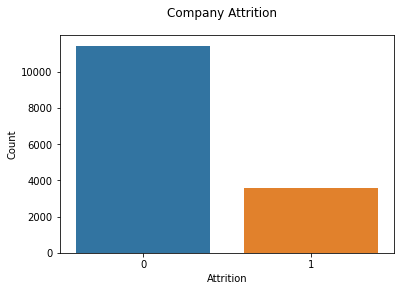

In [55]:
ax=sns.countplot(x='left',data=com_data)
ax.set_ylabel("Count")
ax.set_xlabel("Attrition")
ax.figure.suptitle("Company Attrition")
plt.show()

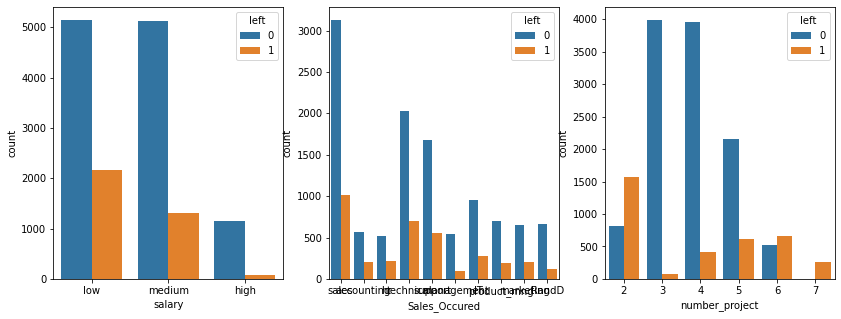

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="salary", hue="left", data=com_data, ax=axes[0])
sns.countplot(x="Sales_Occured", hue="left", data=com_data, ax=axes[1])
sns.countplot(x="number_project", hue="left", data=com_data, ax=axes[2])

# checking for Correlation 

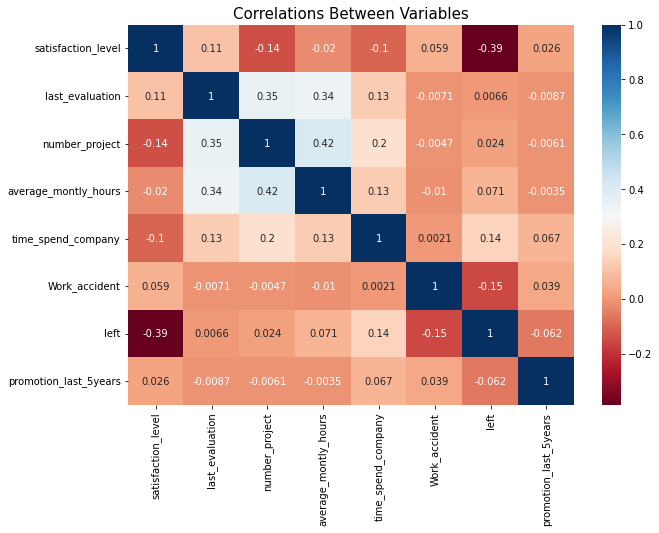

In [37]:

plt.figure(figsize=(10,7))
sns.heatmap(com_data.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

In [38]:
cor= com_data.corr()['left']
cor


satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

# from observation  
 There is no any feature which are highly correlated with "left" feature thats why we  take all the features for the model

In [39]:
com_data=pd.get_dummies(com_data)
com_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured_IT,Sales_Occured_RandD,...,Sales_Occured_hr,Sales_Occured_management,Sales_Occured_marketing,Sales_Occured_product_mng,Sales_Occured_sales,Sales_Occured_support,Sales_Occured_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Define independent and target variable

In [40]:
X=com_data.drop(["left"],axis=1)
Y=com_data["left"]

# Model selection

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


# Standard scaling

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(X_train)

array([[-0.33299672, -1.15778093, -1.4550047 , ..., -0.29850944,
        -0.97525603,  1.14967834],
       [ 0.63418845, -1.09919068,  0.96656904, ..., -0.29850944,
        -0.97525603,  1.14967834],
       [ 1.11778104,  0.42415563, -0.64781345, ..., -0.29850944,
        -0.97525603,  1.14967834],
       ...,
       [ 0.31179339,  1.30300928,  0.96656904, ..., -0.29850944,
        -0.97525603,  1.14967834],
       [ 0.67448783, -0.74764922,  0.96656904, ...,  3.34997785,
        -0.97525603, -0.86980851],
       [-0.21209858, -0.22033704,  0.96656904, ..., -0.29850944,
         1.02537177, -0.86980851]])

# Applying algorithms

In [43]:
# Applying RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
model_rfc=rfc.fit(X_train,Y_train)

pred_rfc=model_rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print("Random Forest Classifire:",accuracy_score(Y_test,pred_rfc))

Random Forest Classifire: 0.9888888888888889


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)
Score_rfc_train=rfc.score(X_train,Y_train)
Score_rfc_test=rfc.score(X_test,Y_test)
print(Score_rfc_train)
print(Score_rfc_test)

1.0
0.9888888888888889


**APPLYING CONFUSION MATRIX**

In [60]:
train_predict_rfc= rfc.predict(X_train)
test_predict_rfc=rfc.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
cr = classification_report(Y_train,train_predict_rfc)
print(cr)
cr = classification_report(Y_test,test_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7966
           1       1.00      1.00      1.00      2533

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.96      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [65]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(Y_test,test_predict_rfc)
conf_matix

array([[3449,   13],
       [  37, 1001]])

In [45]:
#Applying  Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=50)
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=50)

In [46]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [47]:
Score_lr_train=lr.score(X_train,Y_train)
Score_lr_test=lr.score(X_test,Y_test)
print(Score_lr_train)
print(Score_lr_test)

0.7925516715877703
0.792


In [48]:
# Applying GaussianNB Algorithm
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
GaussianNB()
test_predict=gnb.predict(X_test)
train_predict=gnb.predict(X_train)
Score_GNB_train=gnb.score(X_train,Y_train)
Score_GNB_test=gnb.score(X_test,Y_test)
print(Score_GNB_train)
print(Score_GNB_test)

0.6619678064577579
0.6651111111111111


# Model Comparison

In [49]:
Model_Comparison = pd.DataFrame({
    'Model' : ['Linear Regression','Random Forest Classifier','GaussianNB'],
    'Scores_train': [Score_lr_train* 100 ,Score_rfc_train* 100,Score_GNB_train*100],
    "Score_test":[Score_lr_test*100, Score_rfc_test*100,Score_GNB_test*100]
    })
Model_Comparison

,Model,Scores_train,Score_test
0,Linear Regression,79.255167,79.200000
1,Random Forest Classifier,100.000000,98.888889
2,GaussianNB,66.196781,66.511111
